In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("ready_data.xlsx")

In [8]:
import matplotlib.pyplot as plt

In [12]:
df_no_refunds = df[df['refunded'] != True]

In [13]:
# Count of ticket categories
ticket_category_counts = df_no_refunds['ticket_category'].value_counts()


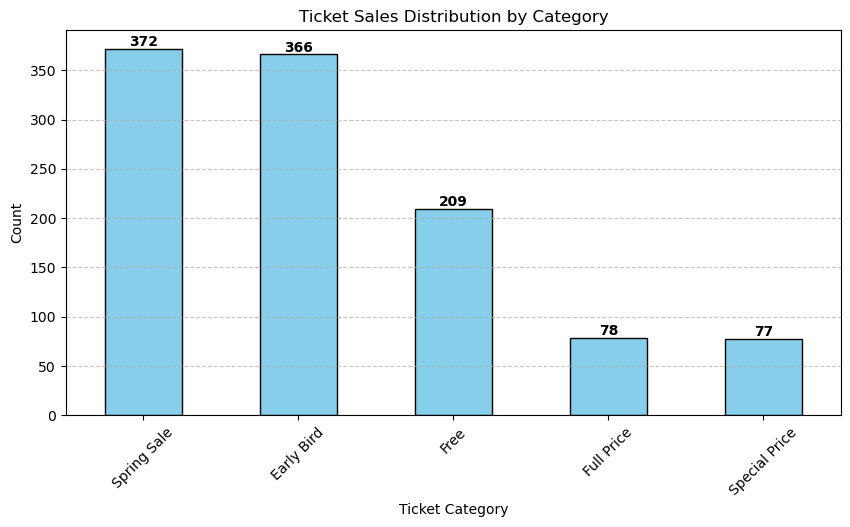

In [16]:

# Plot Ticket Sales Distribution by Category
plt.figure(figsize=(10, 5))
bars = ticket_category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of the bar)
            bar.get_height(),  # Y-coordinate (top of the bar)
            f'{int(bar.get_height())}',  # Label text (convert height to integer)
            ha='center', va='bottom', fontsize=10, fontweight='bold')  # Styling
plt.title('Ticket Sales Distribution by Category')
plt.xlabel('Ticket Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:
df['registration_date'] = pd.to_datetime(df['registration_date'], errors='coerce')

In [18]:
# Revenue per ticket category
revenue_per_category = df.groupby('ticket_category')['paid'].sum()

In [19]:
# Average and median price per ticket category
avg_price_per_category = df.groupby('ticket_category')['paid'].mean()
median_price_per_category = df.groupby('ticket_category')['paid'].median()

In [21]:
# Total revenue
total_revenue = df['paid'].sum()

In [24]:
# Sales trend over time (weekly sales)
weekly_sales = df.resample('W', on='registration_date')['paid'].sum()

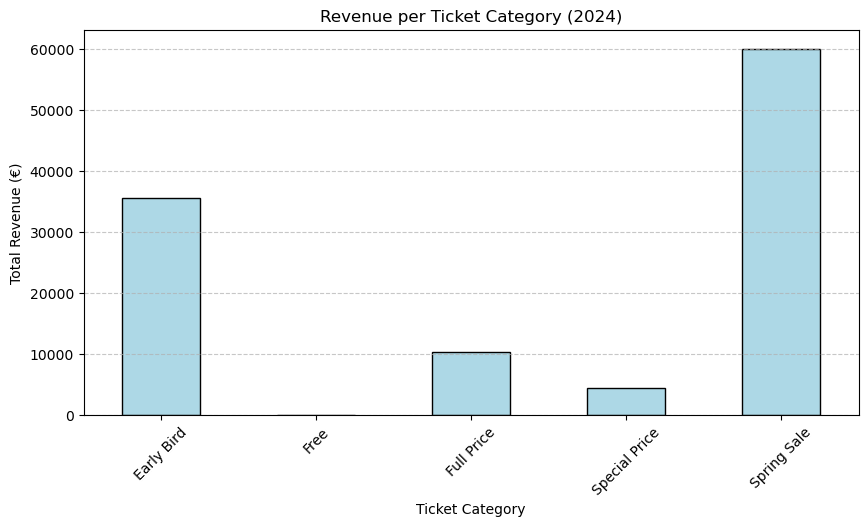

In [25]:

# Plot Revenue by Ticket Category
plt.figure(figsize=(10, 5))
revenue_per_category.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Revenue per Ticket Category (2024)')
plt.xlabel('Ticket Category')
plt.ylabel('Total Revenue (€)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

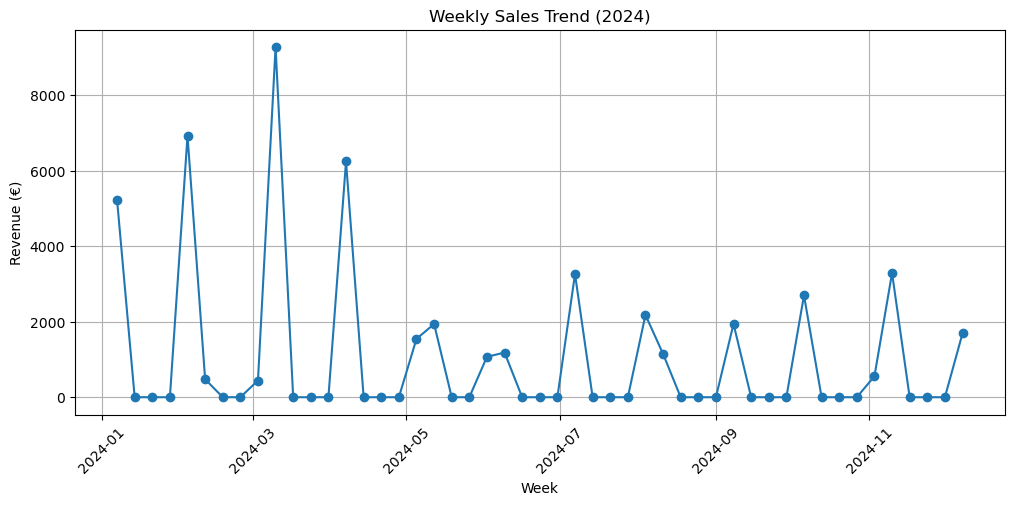

In [26]:
# Plot Weekly Sales Trend
plt.figure(figsize=(12, 5))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o', linestyle='-')
plt.title('Weekly Sales Trend (2024)')
plt.xlabel('Week')
plt.ylabel('Revenue (€)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [27]:

# Display the summary
pricing_suggestions = pd.DataFrame({
    'Avg Price (€)': avg_price_per_category,
    'Median Price (€)': median_price_per_category,
    'Total Revenue (€)': revenue_per_category
}).reset_index()

In [28]:
pricing_suggestions

,ticket_category,Avg Price (€),Median Price (€),Total Revenue (€)
0,Early Bird,89.100000,99.0,35640
1,Free,0.000000,0.0,0
2,Full Price,132.641026,159.0,10346
3,Special Price,53.928571,57.5,4530
4,Spring Sale,155.800518,179.0,60139
